In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [1]:
with open('/home/ahojel/visual_prompting_vid/output_dir/baselinescan_2/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data = data[1:]
data = [eval(line.strip()) for line in data]

# Create a DataFrame
nonfiltered_df = pd.DataFrame(data)


NameError: name 'pd' is not defined

In [10]:
with open('/home/ahojel/visual_prompting_vid/output_dir/valset_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data = data[1:]
data = [eval(line.strip()) for line in data]

# Create a DataFrame
filtered_df = pd.DataFrame(data)


In [12]:
df = filtered_df


In [7]:
unique_tasks = filtered_df['task'].unique()
# Setting up the grid for plotting - assuming there are 6 unique tasks
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 12))  # Adjusted for more space

# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    row = i // num_cols
    col = i % num_cols

    filtered_df_task = filtered_df[filtered_df['task'] == task]
    nonfiltered_df_task = nonfiltered_df[nonfiltered_df['task'] == task]

    f_grouped_data = filtered_df_task.groupby(['lambda'])[['metric',"r_metric"]].mean().reset_index()
    nf_grouped_data = nonfiltered_df_task.groupby(['lambda'])[['metric',"r_metric"]].mean().reset_index()

    flambda_zero_metric = f_grouped_data[f_grouped_data['lambda'] == 0]['metric'].mean()
    fbaseline_metric = filtered_df_task[filtered_df_task['lambda'].isna()]["metric"].mean()
    fbest_lambda = f_grouped_data['lambda'][f_grouped_data['metric'].idxmin()]
    fbest_lambda_metric = f_grouped_data['metric'].min()

    
    facc_diff = fbest_lambda_metric - fbaseline_metric
    fnormalizer = flambda_zero_metric - fbaseline_metric
    fpercent_acc = facc_diff / fnormalizer

    nflambda_zero_metric = nf_grouped_data[nf_grouped_data['lambda'] == 0]['metric'].mean()
    nfbaseline_metric = nonfiltered_df_task[nonfiltered_df_task['lambda'].isna()]["metric"].mean()
    nfbest_lambda = nf_grouped_data['lambda'][nf_grouped_data['metric'].idxmin()]
    nfbest_lambda_metric = nf_grouped_data['metric'].min()

    
    nfacc_diff = nfbest_lambda_metric - nfbaseline_metric
    nfnormalizer = nflambda_zero_metric - nfbaseline_metric
    nfpercent_acc = nfacc_diff / nfnormalizer

    bar_labels = ['Filtered T-Set', "Non-Filtered T-Set"]
    bar_values = [1-fpercent_acc, 1-nfpercent_acc]

    
    axes[row, col].bar(bar_labels, bar_values, color=['#1f77b4', '#ff7f0e'])  # Example colors

    axes[row, col].set_title(task, fontsize=14)
    axes[row, col].set_ylabel('Percent Accuracy to ICL Prompt', fontsize=12)
    axes[row, col].grid(True)
    axes[row, col].tick_params(labelrotation=45, labelsize=10)
    #axes[row, col].autoscale(enable=True, axis='y', tight=True)  # Autoscale the y-axis

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle in which to fit subplots
fig.suptitle("MSE for Validation Set", fontsize=16)
plt.show()


NameError: name 'filtered_df' is not defined

In [ ]:
df_segmentation = df[df['task'] == 'label_segmentation']

df_segmentation = df_segmentation[df_segmentation['encoder']==False]

grouped_data = df_segmentation.groupby(['lambda', 'vector','encoder'])[['r_iou',"iou"]].mean().reset_index()

# Creating the line plot with the corrected data
plt.figure(figsize=(10, 6))
for vector_type, encoder_type in grouped_data[['vector', 'encoder']].drop_duplicates().values:
    df_filtered = grouped_data[(grouped_data['vector'] == vector_type) & (grouped_data['encoder'] == encoder_type)]
    label = f"{vector_type} - {'Both' if encoder_type else 'Decoder Only'}"
    linestyle = '-' if encoder_type else '--'
    plt.plot(df_filtered['lambda'].to_numpy(), df_filtered['r_iou'].to_numpy(), label="relative")
    plt.plot(df_filtered['lambda'].to_numpy(), df_filtered['iou'].to_numpy(), label="absolute")

#baseline = df[df['task'] == 'label_segmentation'][df[df['task'] == 'label_segmentation']['lambda'].isna()]["accuracy"].mean()
#plt.axhline(y=baseline, color='red', linestyle='--', label='Baseline')

plt.xlabel('Lambda')
plt.ylabel('Average Metric')
plt.title('Average Metric vs Lambda by Vector Type')
plt.legend()
plt.grid(True)
plt.show()

3.3899375993643015
0.6271931769118768
0.5650035025265867
0.6733354164639295
0.5595049902165826
0.5628610739913908


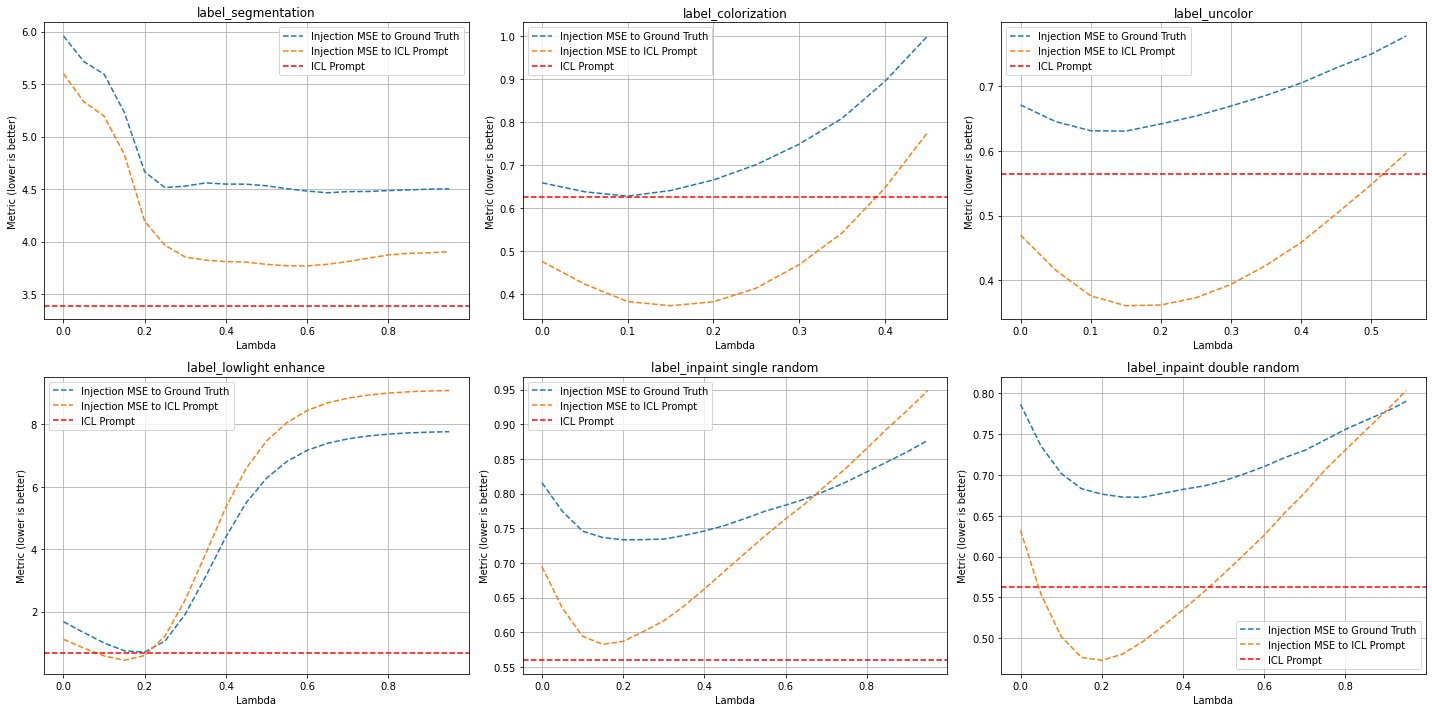

In [13]:
unique_tasks = df['task'].unique()
# Setting up the grid for plotting - assuming there are 6 unique tasks
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    # Calculate the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols

    # Filter the dataframe for the current task and group by 'lambda' and 'vector'
    df_task = df[df['task'] == task]
    grouped_data = df_task.groupby(['lambda','vector','encoder',"only_cls"])[['metric',"r_metric"]].mean().reset_index()

    # Creating the line plot for the current task
    for vector_type, encoder_type, cls_type in grouped_data[['vector', 'encoder', 'only_cls']].drop_duplicates().values:
        df_filtered = grouped_data[(grouped_data['vector'] == vector_type) & (grouped_data['encoder'] == encoder_type)& (grouped_data['only_cls'] == cls_type)]
        if (task == "label_colorization"):
            df_filtered = df_filtered[df_filtered["metric"]<1]
        if (task == "label_uncolor"):
            df_filtered = df_filtered[df_filtered["metric"]<0.8]
        label = f"Injection MSE to Ground Truth"
        linestyle = '-' if encoder_type else '--'
        axes[row, col].plot(df_filtered['lambda'].to_numpy(), df_filtered['metric'].to_numpy(), label=label, linestyle=linestyle)
        axes[row, col].plot(df_filtered['lambda'].to_numpy(), df_filtered['r_metric'].to_numpy(), label="Injection MSE to ICL Prompt", linestyle=linestyle)
    
    baseline = df_task[df_task['lambda'].isna()]["metric"].mean()
    print(baseline)
    axes[row, col].axhline(y=baseline, color='red', linestyle='--', label='ICL Prompt')
    
    axes[row, col].set_title(task)
    axes[row, col].set_xlabel('Lambda')
    axes[row, col].set_ylabel('Metric (lower is better)')
    axes[row, col].legend()
    axes[row, col].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

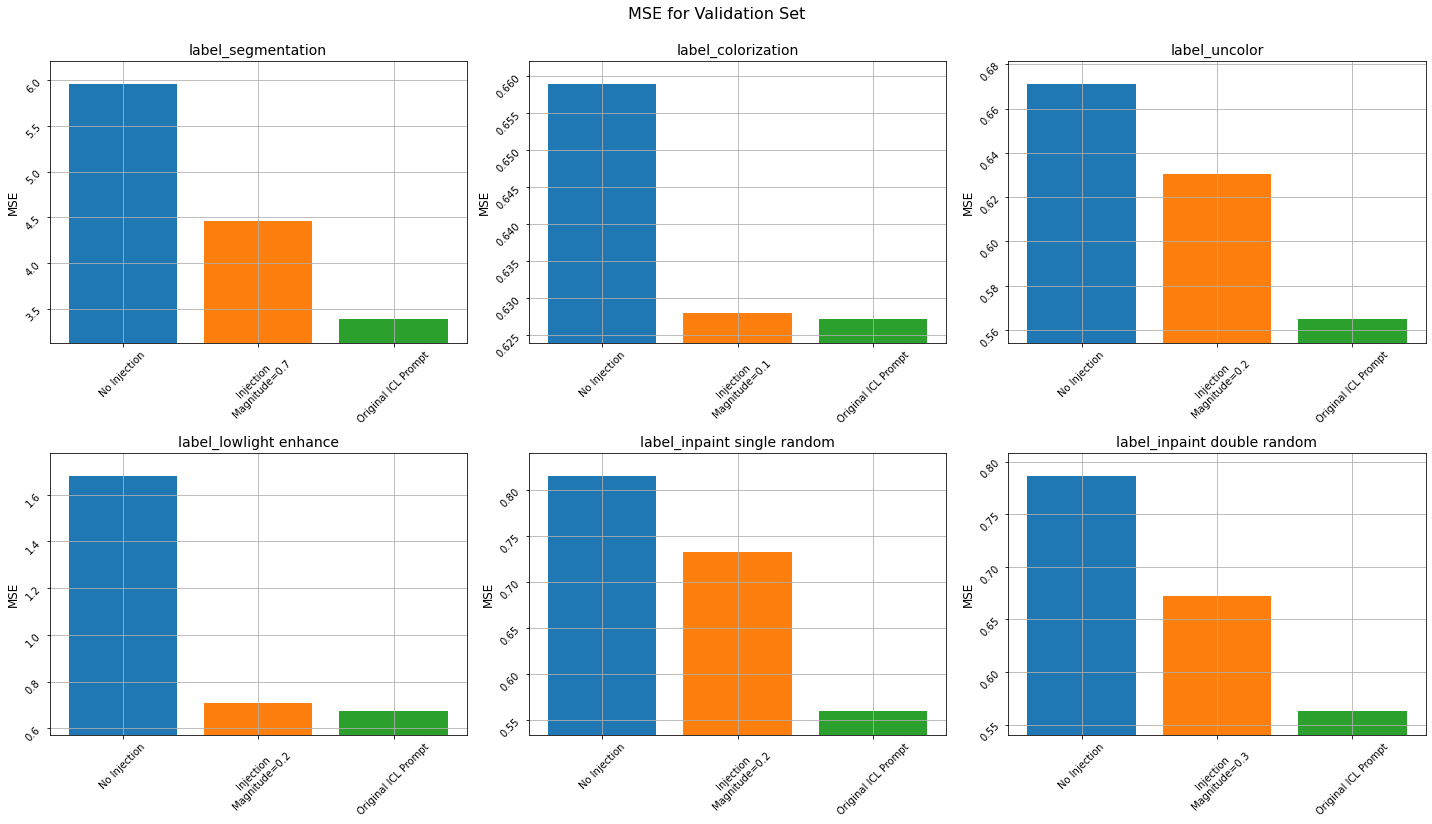

In [14]:
unique_tasks = df['task'].unique()
# Setting up the grid for plotting - assuming there are 6 unique tasks
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 12))  # Adjusted for more space

# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    row = i // num_cols
    col = i % num_cols
    df_task = df[df['task'] == task]
    grouped_data = df_task.groupby(['lambda'])[['metric',"r_metric"]].mean().reset_index()

    lambda_zero_metric = grouped_data[grouped_data['lambda'] == 0]['metric'].mean()
    baseline_metric = df_task[df_task['lambda'].isna()]["metric"].mean()
    best_lambda = grouped_data['lambda'][grouped_data['metric'].idxmin()]
    best_lambda_metric = grouped_data['metric'].min()

    bar_labels = ['No Injection', f'Injection\nMagnitude={best_lambda:.1f}', 'Original ICL Prompt']
    bar_values = [lambda_zero_metric, best_lambda_metric, baseline_metric]
    axes[row, col].bar(bar_labels, bar_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])  # Example colors

    axes[row, col].set_title(task, fontsize=14)
    axes[row, col].set_ylabel('MSE', fontsize=12)
    axes[row, col].grid(True)
    axes[row, col].tick_params(labelrotation=45, labelsize=10)
    axes[row, col].set_ylim([min(bar_values)-0.1*(max(bar_values) - min(bar_values)), max(bar_values)+0.1*(max(bar_values) - min(bar_values))])  # Rotate labels and adjust size
    #axes[row, col].autoscale(enable=True, axis='y', tight=True)  # Autoscale the y-axis

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle in which to fit subplots
fig.suptitle("MSE for Validation Set", fontsize=16)
plt.show()


In [20]:
df

,query_name,support_name,task,lambda,metric,vector,encoder,only_cls,iou,accuracy,r_metric,r_iou,r_accuracy
0,2007_000452,2010_001699,label_segmentation,0.00,4.002749,mean,False,False,0.011757,0.522441,3.988689,0.215389,0.513351
1,2007_000452,2010_001699,label_segmentation,0.05,3.645634,mean,False,False,0.016209,0.596056,3.966060,0.242241,0.583881
2,2007_000452,2010_001699,label_segmentation,0.10,3.154208,mean,False,False,0.015223,0.695479,3.759419,0.329357,0.707978
3,2007_000452,2010_001699,label_segmentation,0.15,4.168440,mean,False,False,0.003153,0.743365,3.780028,0.383559,0.766902
4,2007_000452,2010_001699,label_segmentation,0.20,4.446461,mean,False,False,0.000000,0.769093,3.737072,0.401468,0.788248
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125994,2007_009897,2011_001530,label_inpaint double random,0.75,0.620255,mean,False,False,NaN,NaN,0.547632,NaN,NaN
125995,2007_009897,2011_001530,label_inpaint double random,0.80,0.624165,mean,False,False,NaN,NaN,0.577565,NaN,NaN
125996,2007_009897,2011_001530,label_inpaint double random,0.85,0.635138,mean,False,False,NaN,NaN,0.591063,NaN,NaN
125997,2007_009897,2011_001530,label_inpaint double random,0.90,0.613450,mean,False,False,NaN,NaN,0.607530,NaN,NaN


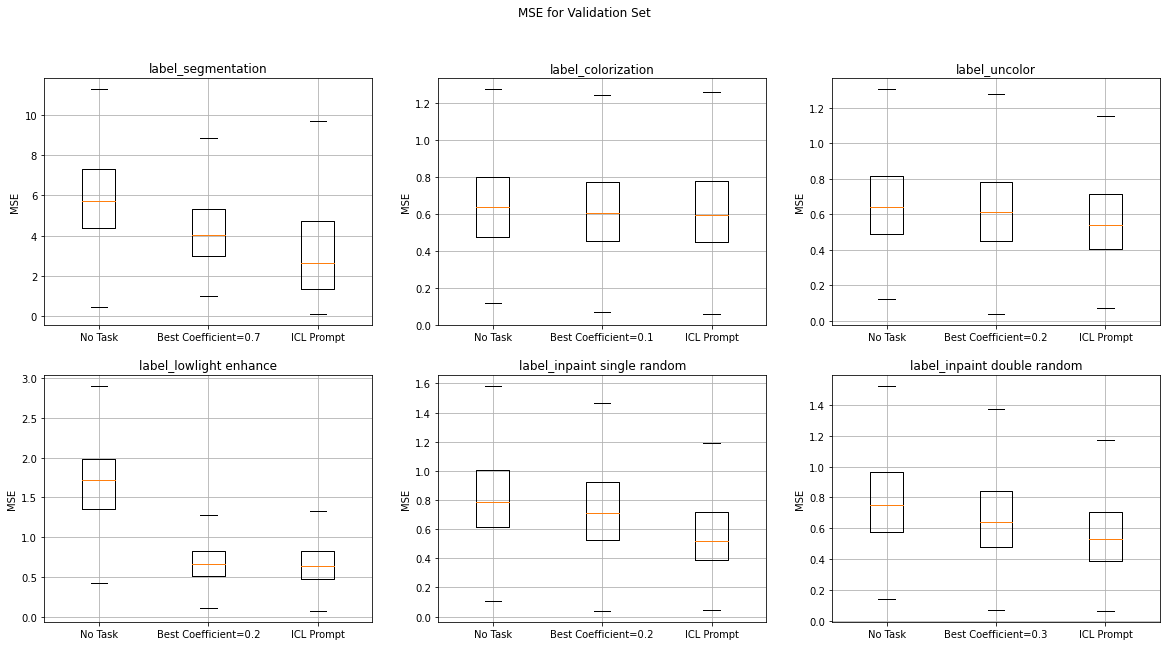

In [15]:
unique_tasks = df['task'].unique()
# Setting up the grid for plotting - assuming there are 6 unique tasks
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))


# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    # Calculate the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols

    # Filter the dataframe for the current task and group by 'lambda' and 'vector'
    df_task = df[df['task'] == task]
    grouped_data = df_task.groupby(['lambda'])[['metric',"r_metric"]].mean().reset_index()

    # Creating the box and whiskers plot for the current task
    lambda_zero_metric = df_task[df_task['lambda'] == 0]['metric']
    baseline_metric = df_task[df_task['lambda'].isna()]["metric"]
    best_lambda = grouped_data['lambda'][grouped_data['metric'].idxmin()]
    best_lambda_metric = df_task[df_task['lambda'] == best_lambda]['metric']

    # Plotting the metrics
    data_to_plot = [lambda_zero_metric, best_lambda_metric, baseline_metric]
    axes[row, col].boxplot(data_to_plot, labels=['No Task', f'Best Coefficient={best_lambda:.1f}', 'ICL Prompt'], showfliers=False, whiskerprops={'linestyle': 'none'})

    axes[row, col].set_title(task)
    axes[row, col].set_ylabel('MSE')
    axes[row, col].grid(True)

# Adjust layout to prevent overlap
fig.suptitle("MSE for Validation Set")
plt.show()

/tmp/ipykernel_1062386/1079932571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lowlight["metric"] = df_lowlight["metric"] / baseline_performance


ValueError: zero-size array to reduction operation fmin which has no identity

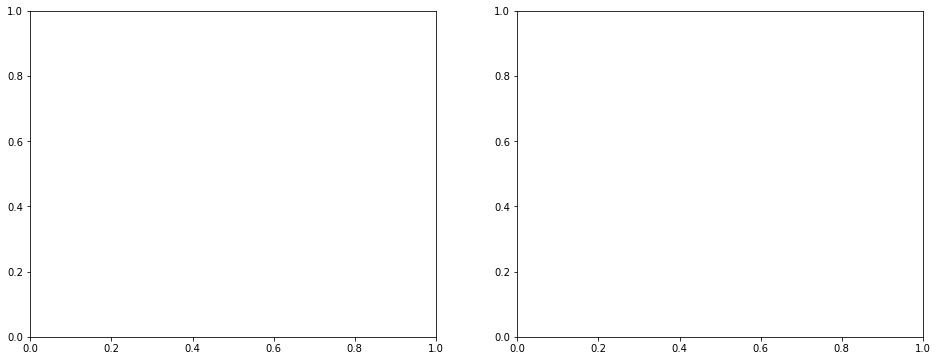

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df_lowlight = df[df['task'] == 'label_lowlight enhance']
baseline_performance = df_lowlight[df_lowlight["lambda"].isna()]["metric"].mean()
df_lowlight["metric"] = df_lowlight["metric"] / baseline_performance

# Setting up the figure and axes for two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Heatmap for encoder=True
pivot_table_true = df_lowlight[df_lowlight["encoder"]==True].pivot_table(values='metric', index='lambda', columns='vector')
sns.heatmap(pivot_table_true, ax=axes[0])
axes[0].set_title('Heatmap of Metrics by Lambda and Vector Type (Encoder=True)')
axes[0].set_xlabel('Vector Type')
axes[0].set_ylabel('Lambda')

# Heatmap for encoder=False
pivot_table_false = df_lowlight[df_lowlight["encoder"]==False].pivot_table(values='metric', index='lambda', columns='vector')
sns.heatmap(pivot_table_false, ax=axes[1])
axes[1].set_title('Heatmap of Metrics by Lambda and Vector Type (Encoder=False)')
axes[1].set_xlabel('Vector Type')
axes[1].set_ylabel('Lambda')

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_lowlight = df[df['task'] == 'label_lowlight enhance']
baseline_performance = df_lowlight[df_lowlight["lambda"].isna()]["metric"].mean()
df_lowlight["metric"] = df_lowlight["metric"] / baseline_performance

# Setting up the figure and axes for two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Heatmap for encoder=True
pivot_table_true = df_lowlight[df_lowlight["encoder"]==True].pivot_table(values='metric', index='lambda', columns='vector')
sns.heatmap(pivot_table_true, ax=axes[0])
axes[0].set_title('Heatmap of Metrics by Lambda and Vector Type (Encoder=True)')
axes[0].set_xlabel('Vector Type')
axes[0].set_ylabel('Lambda')

# Heatmap for encoder=False
pivot_table_false = df_lowlight[df_lowlight["encoder"]==False].pivot_table(values='metric', index='lambda', columns='vector')
sns.heatmap(pivot_table_false, ax=axes[1])
axes[1].set_title('Heatmap of Metrics by Lambda and Vector Type (Encoder=False)')
axes[1].set_xlabel('Vector Type')
axes[1].set_ylabel('Lambda')

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:

df_lowlight = df[df['task'] == 'label_lowlight enhance']

df_lowlight_filtered = df_lowlight.dropna(subset=['lambda'])
df_lowlight_filtered.groupby(['query_name', 'support_name'])['metric'].min().mean()


idx_best_performers = df_lowlight_filtered.groupby(['query_name', 'support_name'])['metric'].idxmin()
best_performing_rows = df_lowlight_filtered.loc[idx_best_performers]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting the 'vector' value counts on the first subplot
best_performing_rows["vector"].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Vector Value Counts')
axes[0].set_ylabel('Counts')
axes[0].set_xlabel('Vector')

# Plotting the 'encoder' value counts on the second subplot
best_performing_rows["encoder"].value_counts().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Encoder Value Counts')
axes[1].set_ylabel('Counts')
axes[1].set_xlabel('Encoder')

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
df_lowlight[df_lowlight["lambda"].isna()]["metric"].mean()

In [ ]:
df[df["lambda"]==1.75]['segmentation_iou'].hist()

In [ ]:
import numpy as np

np.array(avg_iou.index)

In [ ]:
import matplotlib.pyplot as plt

avg_iou = df.groupby("lambda")["segmentation_iou"].mean()
plt.figure(figsize=(10, 6))
plt.plot(np.array(avg_iou.index), avg_iou.values, marker='o')
plt.xlabel('Lambda')
plt.ylabel('Average IoU')
plt.title('Average IoU vs Lambda')
plt.grid(True)




In [ ]:
df

In [ ]:
for task in df['task'].unique():
    plt.figure(figsize=(10, 6))
    plt.hist(df[(df["lambda"]==0) & (df['task']==task)]['metric'], bins=10, alpha=0.5, label='neutral_prompt')
    plt.hist(df[(df["lambda"].isna()) & (df['task']==task)]['metric'], bins=10, alpha=0.5, label='ICL_prompt')
    plt.hist(df[(~df["lambda"].isna()) & (df["lambda"]!=0) & (df['task']==task)]['metric'], bins=10, alpha=0.5, label='optimal_injection')
    plt.title(f'Histogram of metric for task: {task}')
    plt.xlabel('Metric')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


In [ ]:

import matplotlib.pyplot as plt
plt.title("mean IoU")
plt.hist(df[df["lambda"]==0]['segmentation_iou'], alpha=0.5, label='original')
plt.hist(df[df["lambda"]==1.25]['segmentation_iou'], alpha=0.5, label='lambda = 1.75')
plt.legend(loc='upper right')
plt.show()





In [ ]:
df["segmentation_iou"].hist()

In [ ]:
with open('output_dir/base1/log.txt', 'r') as file:
    data = file.readlines()

# Convert each line from string to dictionary
data = [eval(line.strip()) for line in data]

# Create a DataFrame
df = pd.DataFrame(data)

df_unique = df.drop_duplicates(subset=["query_name", "support_name"])

# Group by 'query_name' and find the one with the lowest average 'iou'
df2 = df_unique[df_unique['iou'] >= 0.2]
grouped_query = df2.groupby('query_name')['iou'].mean()
filtered_query_names = grouped_query[grouped_query >= 0.6].index
filtered_df = df2[df2['query_name'].isin(filtered_query_names)]

# Group by 'support_name' and find the one with the lowest average 'iou'
grouped_support = filtered_df.groupby('support_name')['iou'].mean()
filtered_both_names = grouped_support[grouped_support >= 0.6].index
both_filtered_df = filtered_df[filtered_df['support_name'].isin(filtered_both_names)]


In [ ]:
with open('output_dir/multi_pass/log.txt', 'r') as file:
    data2 = file.readlines()

# Convert each line from string to dictionary
data2 = [eval(line.strip()) for line in data2]

df_multi = pd.DataFrame(data2)

In [ ]:
df_multi[df_multi["support_name"].isin(both_filtered_df["support_name"])]

In [ ]:
# Group by 'query_name' and find the one with the lowest average 'iou'
df2 = df_multi[df_multi['segmentation_iou'] >= 0.2]
grouped_query = df2.groupby('query_name')['segmentation_iou'].mean()
filtered_query_names = grouped_query[grouped_query >= 0.6].index
filtered_df = df2[df2['query_name'].isin(filtered_query_names)]

# Group by 'support_name' and find the one with the lowest average 'iou'
grouped_support = filtered_df.groupby('support_name')['segmentation_iou'].mean()
filtered_both_names = grouped_support[grouped_support >= 0.6].index
both_filtered_df = filtered_df[filtered_df['support_name'].isin(filtered_both_names)]


In [ ]:
new_df = both_filtered_df[both_filtered_df['segmentation_iou'] >= 0.5]

In [ ]:
grouped_support = new_df.groupby('support_name')['inpaint_black_mse'].mean()
filtered_both_names = grouped_support[grouped_support <= 0.5].index
new_df = new_df[new_df['support_name'].isin(filtered_both_names)]

In [ ]:
grouped_support = new_df.groupby('support_name')['colorization_mse'].mean()
filtered_both_names = grouped_support[grouped_support <= 0.5].index
new_df = new_df[new_df['support_name'].isin(filtered_both_names)]

In [ ]:
grouped_support = new_df.groupby('support_name')['lowlight_mse'].mean()
filtered_both_names = grouped_support[grouped_support <= 0.5].index
new_df = new_df[new_df['support_name'].isin(filtered_both_names)]

In [ ]:
filtered_df_sorted = new_df.sort_values(by=['support_name', 'segmentation_iou'], ascending=[True, False])
df_filtered = filtered_df_sorted.drop_duplicates(subset='support_name', keep='first')

filtered_df_sorted2 = df_filtered.sort_values(by=['query_name', 'segmentation_iou'], ascending=[True, False])
df_filtered = filtered_df_sorted2.drop_duplicates(subset='query_name', keep='first')

In [ ]:
list_of_dicts = new_df[['query_name', 'support_name']].to_dict('records')

In [ ]:
import json

with open('top_multitask_pairings2.json', 'w') as file:
    json.dump(list_of_dicts, file, indent=4)